In [2]:
#pip install pandahouse  # если библиотека ещё не установлена
import pandahouse as ph
import pandas as pd 
import seaborn as sns

In [3]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [9]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
    SELECT id, toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price, room_type
    FROM 
        ldn_listings 
    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,id,price,room_type
0,13913,65.0,Private room
1,15400,100.0,Entire home/apt
2,17402,300.0,Entire home/apt
3,17506,150.0,Private room
4,25023,65.0,Entire home/apt
...,...,...,...
995,541081,110.0,Entire home/apt
996,541363,110.0,Entire home/apt
997,542231,65.0,Private room
998,542646,100.0,Entire home/apt


In [12]:
q_test1 = q_test.query('room_type == "Private room"')['price'].quantile(0.75)

In [13]:
q_test1

70.0

In [4]:
# создаем запрос, db автоматически заменится на значение из database
q2 = '''
    SELECT room_type, toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price, \
    toFloat32OrNull(review_scores_rating) as rating
    FROM 
        ldn_listings
    WHERE rating != 0
    ORDER BY id ASC 
    LIMIT 1000
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test2 = ph.read_clickhouse(query=q2, connection=connection_default)
q_test2

,room_type,price,rating
0,Private room,65.0,97.0
1,Entire home/apt,100.0,96.0
2,Entire home/apt,300.0,94.0
3,Entire home/apt,65.0,93.0
4,Private room,29.0,96.0
...,...,...,...
995,Entire home/apt,165.0,100.0
996,Private room,99.0,93.0
997,Private room,45.0,100.0
998,Private room,20.0,88.0


In [5]:
q_test3 = q_test2.groupby('room_type', as_index=False).price.mean()

In [6]:
q_test4 = q_test2.groupby('room_type', as_index=False).rating.mean()

In [7]:
ggg = pd.merge(q_test3, q_test4)

In [8]:
ggg


,room_type,price,rating
0,Entire home/apt,135.882950,93.568787
1,Hotel room,134.000000,92.500000
2,Private room,54.642437,94.766205
3,Shared room,21.000000,90.000000


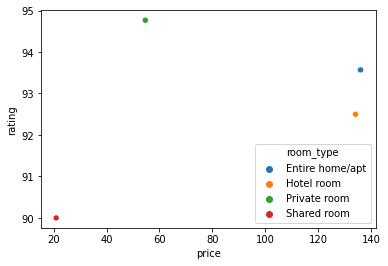

In [9]:
sns.scatterplot(data=ggg, x="price", y="rating", hue='room_type')